## The Sonar data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
sonar_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

In [3]:
sonar_df = pd.read_csv( sonar_url, header=None, prefix='X' )

In [4]:
print( sonar_df.shape )

(208, 61)


In [5]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      208 non-null    float64
 1   X1      208 non-null    float64
 2   X2      208 non-null    float64
 3   X3      208 non-null    float64
 4   X4      208 non-null    float64
 5   X5      208 non-null    float64
 6   X6      208 non-null    float64
 7   X7      208 non-null    float64
 8   X8      208 non-null    float64
 9   X9      208 non-null    float64
 10  X10     208 non-null    float64
 11  X11     208 non-null    float64
 12  X12     208 non-null    float64
 13  X13     208 non-null    float64
 14  X14     208 non-null    float64
 15  X15     208 non-null    float64
 16  X16     208 non-null    float64
 17  X17     208 non-null    float64
 18  X18     208 non-null    float64
 19  X19     208 non-null    float64
 20  X20     208 non-null    float64
 21  X21     208 non-null    float64
 22  X2

In [6]:
sonar_df.rename(columns={'X60':'response'}, inplace=True)

sonar_df.response = sonar_df.response.astype('category')

In [7]:
sonar_df.head()

X0      X1      X2      X3      X4      X5      X6      X7      X8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       X9  ...     X51     X52     X53     X54     X55     X56     X57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      X58     X59  response  
0  0.0090  0.0032         R  
1  0.0052  0.0044         R  
2  0.0095  0.0078         R  
3  0.0040  0.0117         R  
4  0.0107  0.0094         R  

[5 rows x 61 columns]

In [8]:
sonar_df.response.value_counts()

M    111
R     97
Name: response, dtype: int64

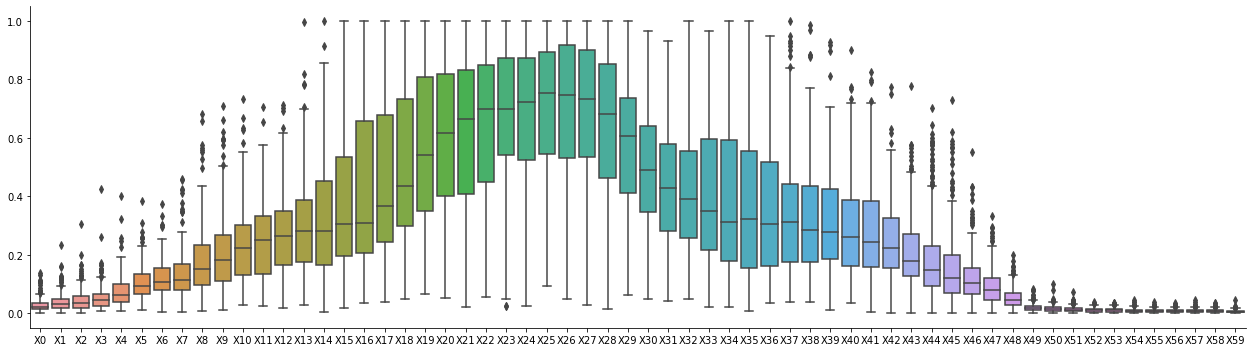

In [9]:
sns.catplot(data = sonar_df, kind='box', aspect=3.5)

plt.show()

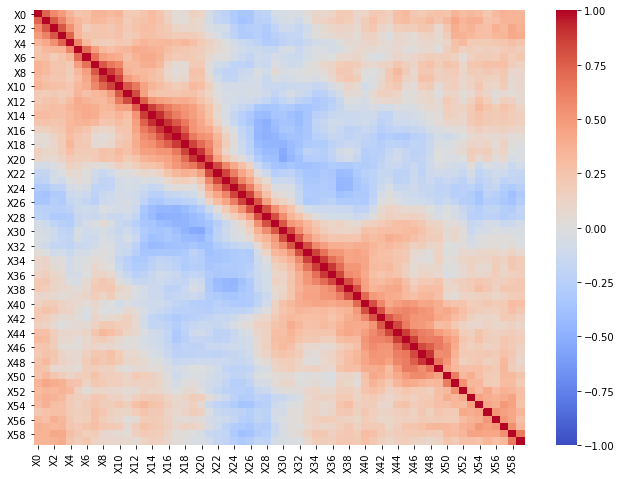

In [11]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.heatmap(data = sonar_df.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm')

plt.show()

## PCA

In [12]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [13]:
sonar_features = sonar_df.select_dtypes('number').copy()

In [14]:
Xsonar = StandardScaler().fit_transform(sonar_features)

Execute PCA with sklearn.

In [15]:
pca_object = PCA()

pca_object.fit(Xsonar)

sonar_pcs = pca_object.transform(Xsonar)

In [16]:
print( sonar_pcs.shape )

(208, 60)


In [17]:
fraction_var_explain = pca_object.explained_variance_ratio_

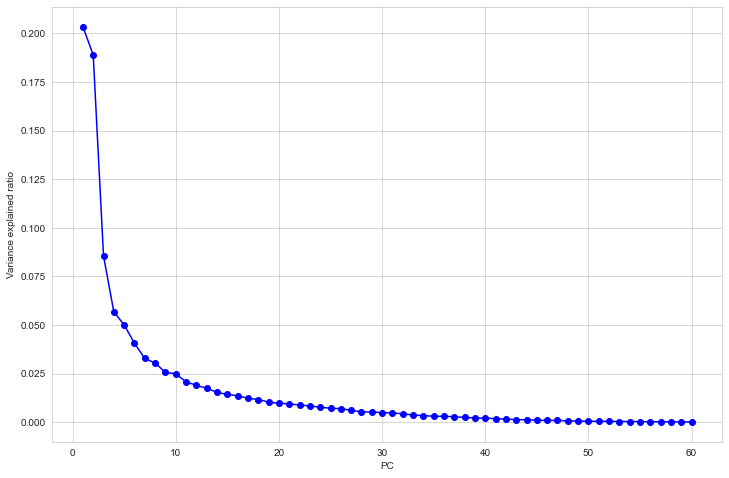

In [18]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(np.arange(len(fraction_var_explain)) + 1, fraction_var_explain, 'bo-')

ax.set_xlabel('PC')
ax.set_ylabel('Variance explained ratio')

plt.show()

## Reshape Sonar

In [19]:
sonar_features = sonar_df.select_dtypes('number').copy()

feature_names = sonar_features.columns

In [20]:
lf = sonar_df.melt(id_vars=['response'], value_vars=feature_names, ignore_index=True)

In [21]:
lf

response variable   value
0            R       X0  0.0200
1            R       X0  0.0453
2            R       X0  0.0262
3            R       X0  0.0100
4            R       X0  0.0762
...        ...      ...     ...
12475        M      X59  0.0157
12476        M      X59  0.0067
12477        M      X59  0.0031
12478        M      X59  0.0048
12479        M      X59  0.0115

[12480 rows x 3 columns]

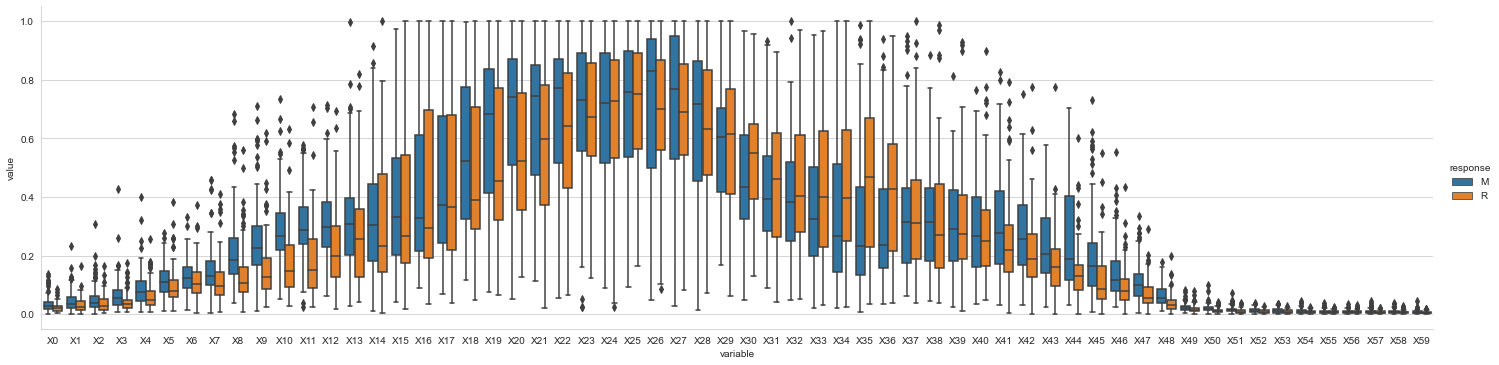

In [23]:
sns.catplot(data = lf, x='variable', y='value', hue='response', kind='box', aspect=4)

plt.show()